In [40]:
import pandas as pd

In [43]:
df = pd.read_csv(r'C:\Users\bradl\OneDrive\Desktop\ML_Final Prep\House Pricing Data (2).csv')

In [76]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [45]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [74]:
missing = df.isnull().sum() / len(df) * 100

In [69]:
missing.sort_values(ascending=False)
threshold = len(df) * 0.7
df.dropna(thresh=threshold, axis=1, inplace=True)

In [75]:
missing.sort_values(ascending=False)

Id              0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
               ... 
MasVnrArea      0.0
Exterior2nd     0.0
Exterior1st     0.0
RoofMatl        0.0
SalePrice       0.0
Length: 75, dtype: float64

In [73]:
df.fillna('ffill', inplace=True)

C:\Users\bradl\AppData\Local\Temp\ipykernel_13356\2018064786.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ffill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('ffill', inplace=True)


In [81]:
df['SalePrice'].describe()
df['SalePrice_Target'] = df['SalePrice'].apply(lambda x: 1 if x > 163000 else 0)
df['SalePrice_Target'].value_counts()

SalePrice_Target
0    732
1    728
Name: count, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

new_df = df.select_dtypes(include=None, exclude=['object'])

X = new_df.drop(['SalePrice', 'SalePrice_Target'], axis=1)
y = new_df['SalePrice_Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_params = {'max_depth':[2,3,4,5,6],
             'min_samples_leaf':[.015,.02,.03,.04,.05],
             'n_estimators':[10, 60, 100]}

rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
rf.fit(X_train, y_train)

print("Best_Params: ", rf.best_params_)
print("Train_Score: ", rf.score(X_train, y_train))
print("Test_Score: ", rf.score(X_test, y_test))

Best_Params:  {'max_depth': 5, 'min_samples_leaf': 0.015, 'n_estimators': 100}
Train_Score:  0.9285714285714286
Test_Score:  0.9269406392694064


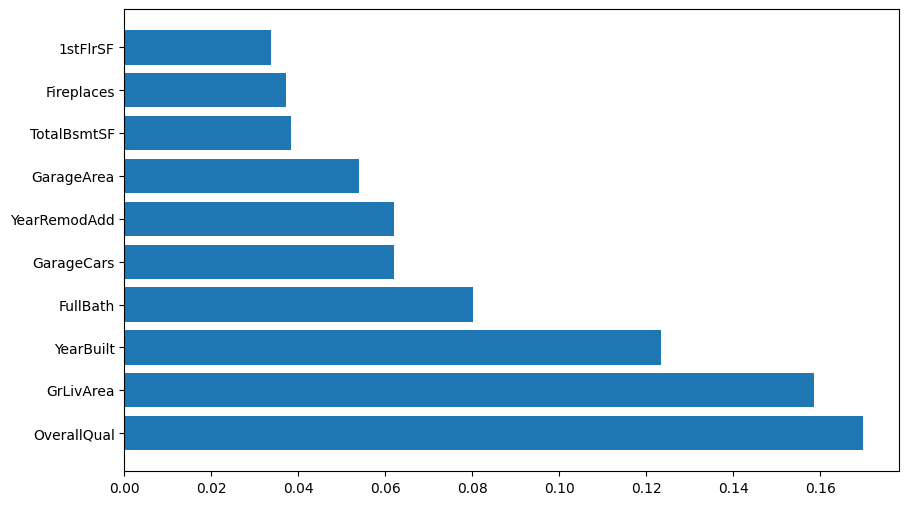

In [88]:
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame(rf.best_estimator_.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.show()

[[213  20]
 [ 12 193]]


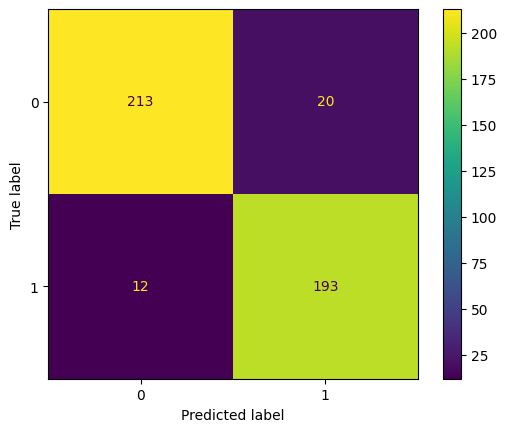

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [92]:
from sklearn.metrics import fbeta_score,  make_scorer

fbeta = make_scorer(fbeta_score, beta=2)

rf_2 = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, scoring=fbeta)
rf_2.fit(X_train, y_train)

print("Best_Params: ", rf_2.best_params_)
print("Train_Score: ", rf_2.score(X_train, y_train))
print("Test_Score: ", rf_2.score(X_test, y_test))

y_pred_2 = rf_2.predict(X_test)


Best_Params:  {'max_depth': 6, 'min_samples_leaf': 0.015, 'n_estimators': 100}
Train_Score:  0.928762926081961
Test_Score:  0.9341723136495643


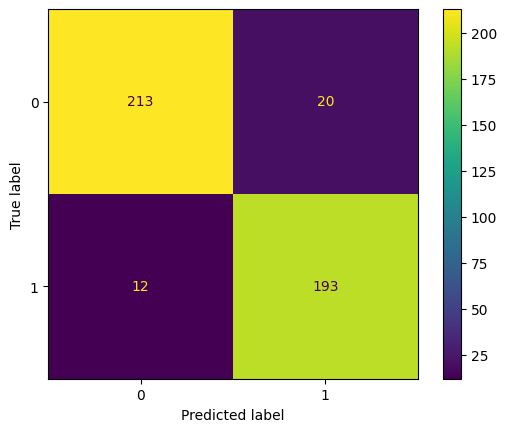

In [94]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2)).plot()

In [97]:
print("1: ",classification_report(y_test, y_pred))
print("2: ",classification_report(y_test, y_pred_2))

1:                precision    recall  f1-score   support

           0       0.95      0.91      0.93       233
           1       0.91      0.94      0.92       205

    accuracy                           0.93       438
   macro avg       0.93      0.93      0.93       438
weighted avg       0.93      0.93      0.93       438

2:                precision    recall  f1-score   support

           0       0.95      0.91      0.93       233
           1       0.91      0.94      0.92       205

    accuracy                           0.93       438
   macro avg       0.93      0.93      0.93       438
weighted avg       0.93      0.93      0.93       438



In [99]:
cost_fp = 1
cost_fn = 5

def cost_sensitive_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return -total_cost(fp, fn, cost_fp, cost_fn)

def total_cost(fp, fn, cost_fp, cost_fn):
    return fp * cost_fp + fn * cost_fn

custom_scorer = make_scorer(cost_sensitive_score)

rf_3 = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, scoring=custom_scorer)

rf_3.fit(X_train, y_train)

print("Best_Params: ", rf_3.best_params_)
print("Train_Score: ", rf_3.score(X_train, y_train))
print("Test_Score: ", rf_3.score(X_test, y_test))

y_pred_3 = rf_3.predict(X_test)

print("3: ",classification_report(y_test, y_pred_3))



Best_Params:  {'max_depth': 4, 'min_samples_leaf': 0.015, 'n_estimators': 10}
Train_Score:  -260
Test_Score:  -97
3:                precision    recall  f1-score   support

           0       0.93      0.93      0.93       233
           1       0.92      0.92      0.92       205

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.92       438



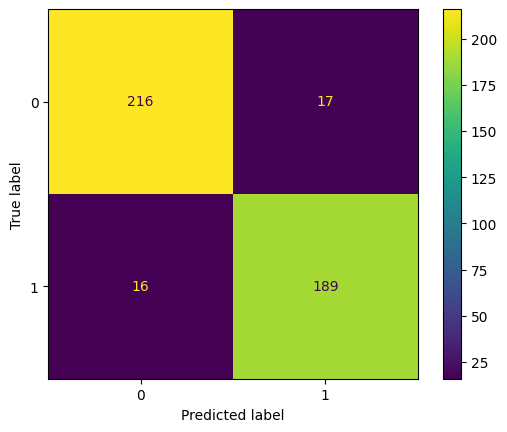

In [100]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_3)).plot()

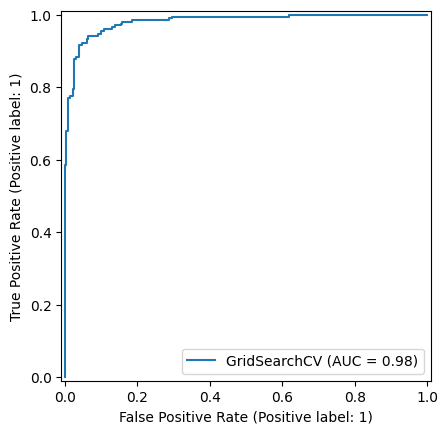

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test)


In [106]:
rf_4 = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1, scoring='roc_auc')
rf_4.fit(X_train, y_train)
print("Best Params: ", rf_4.best_params_)
print("Best Score: ", rf_4.best_score_)

Best Params:  {'max_depth': 6, 'min_samples_leaf': 0.015, 'n_estimators': 100}
Best Score:  0.9710523143523144


In [107]:
y_pred_proba = rf_4.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC: ", roc_auc)

ROC_AUC:  0.9820579922537422


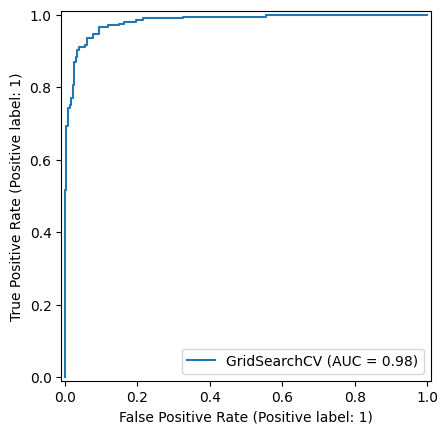

In [108]:
RocCurveDisplay.from_estimator(rf_4, X_test, y_test)